In [5]:
# Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
import missingno as msno
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Load dataset
df = pd.read_csv("fake_job_postings.csv")

# Data Understanding

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

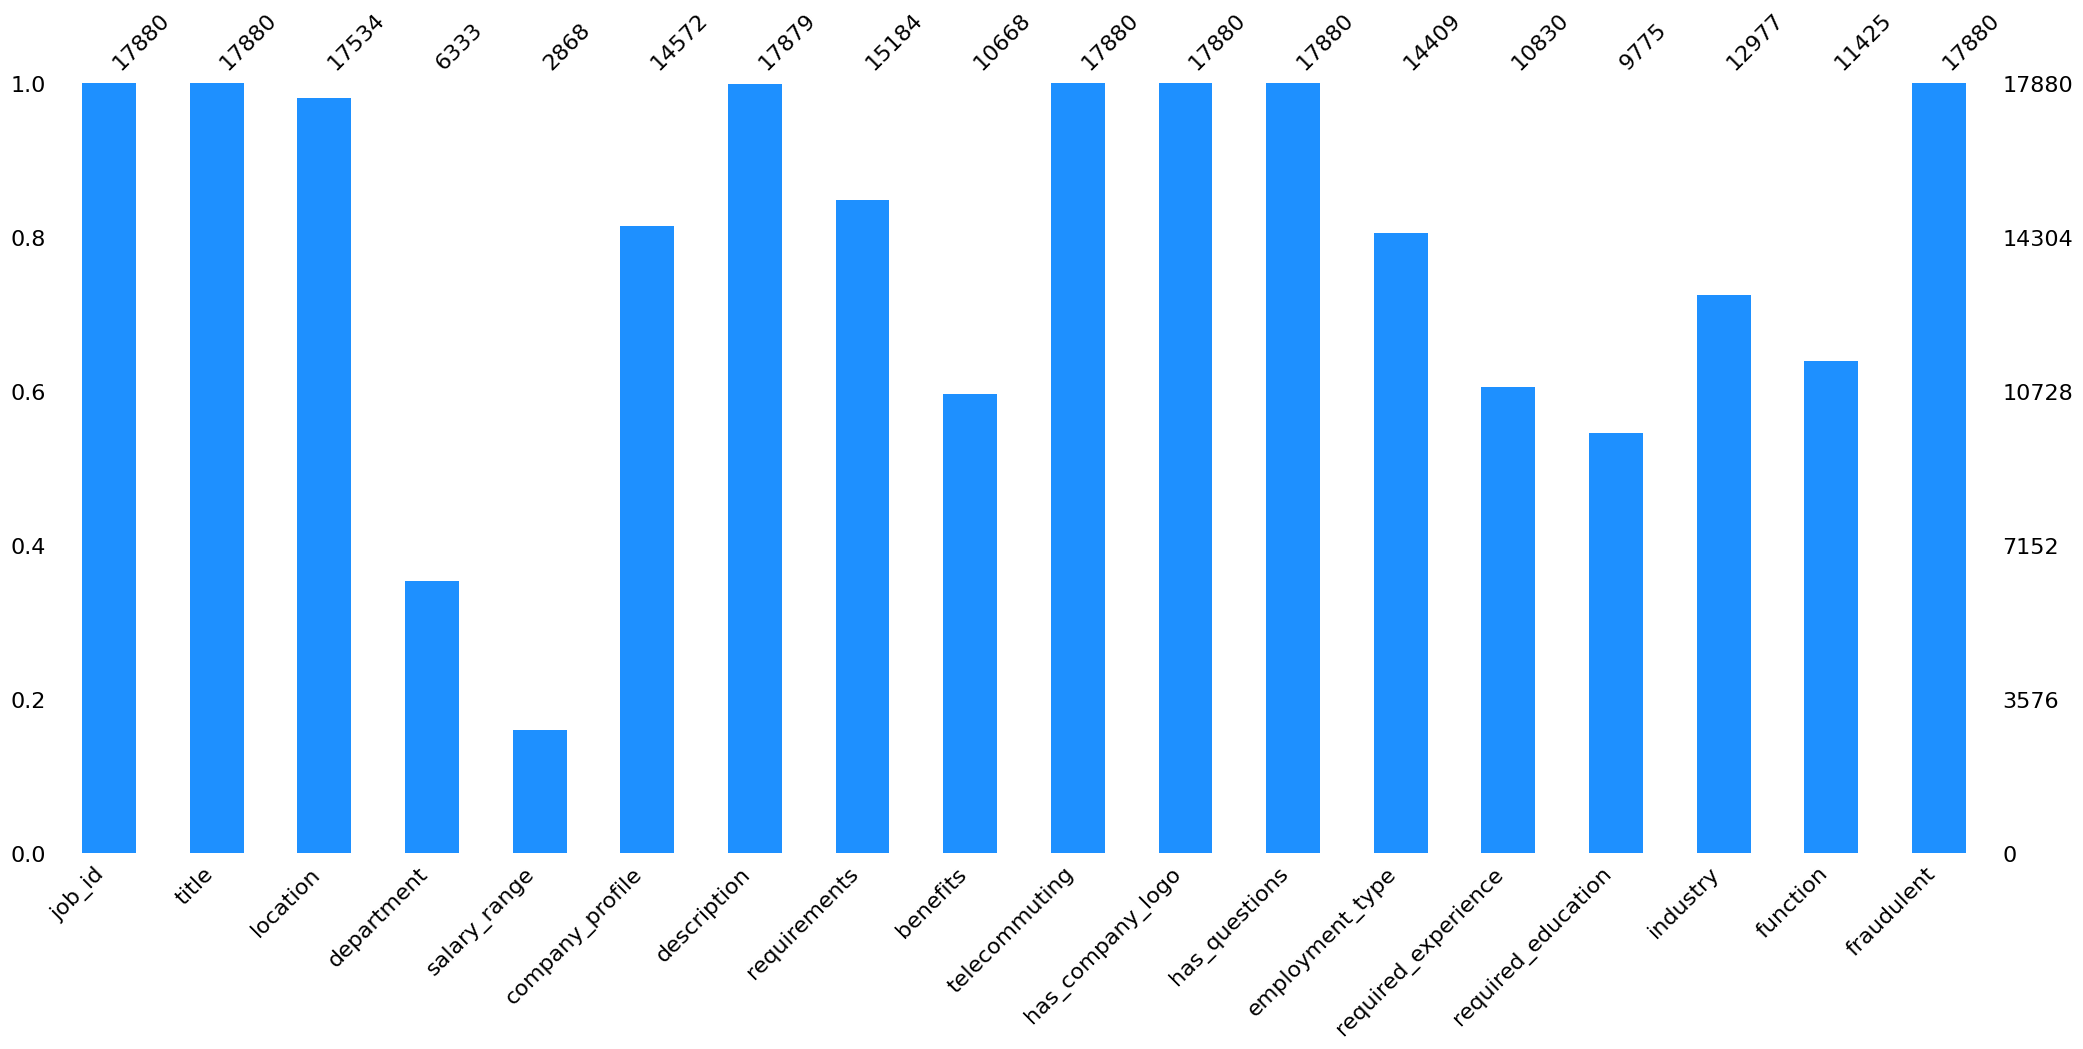

<Figure size 1000x500 with 0 Axes>

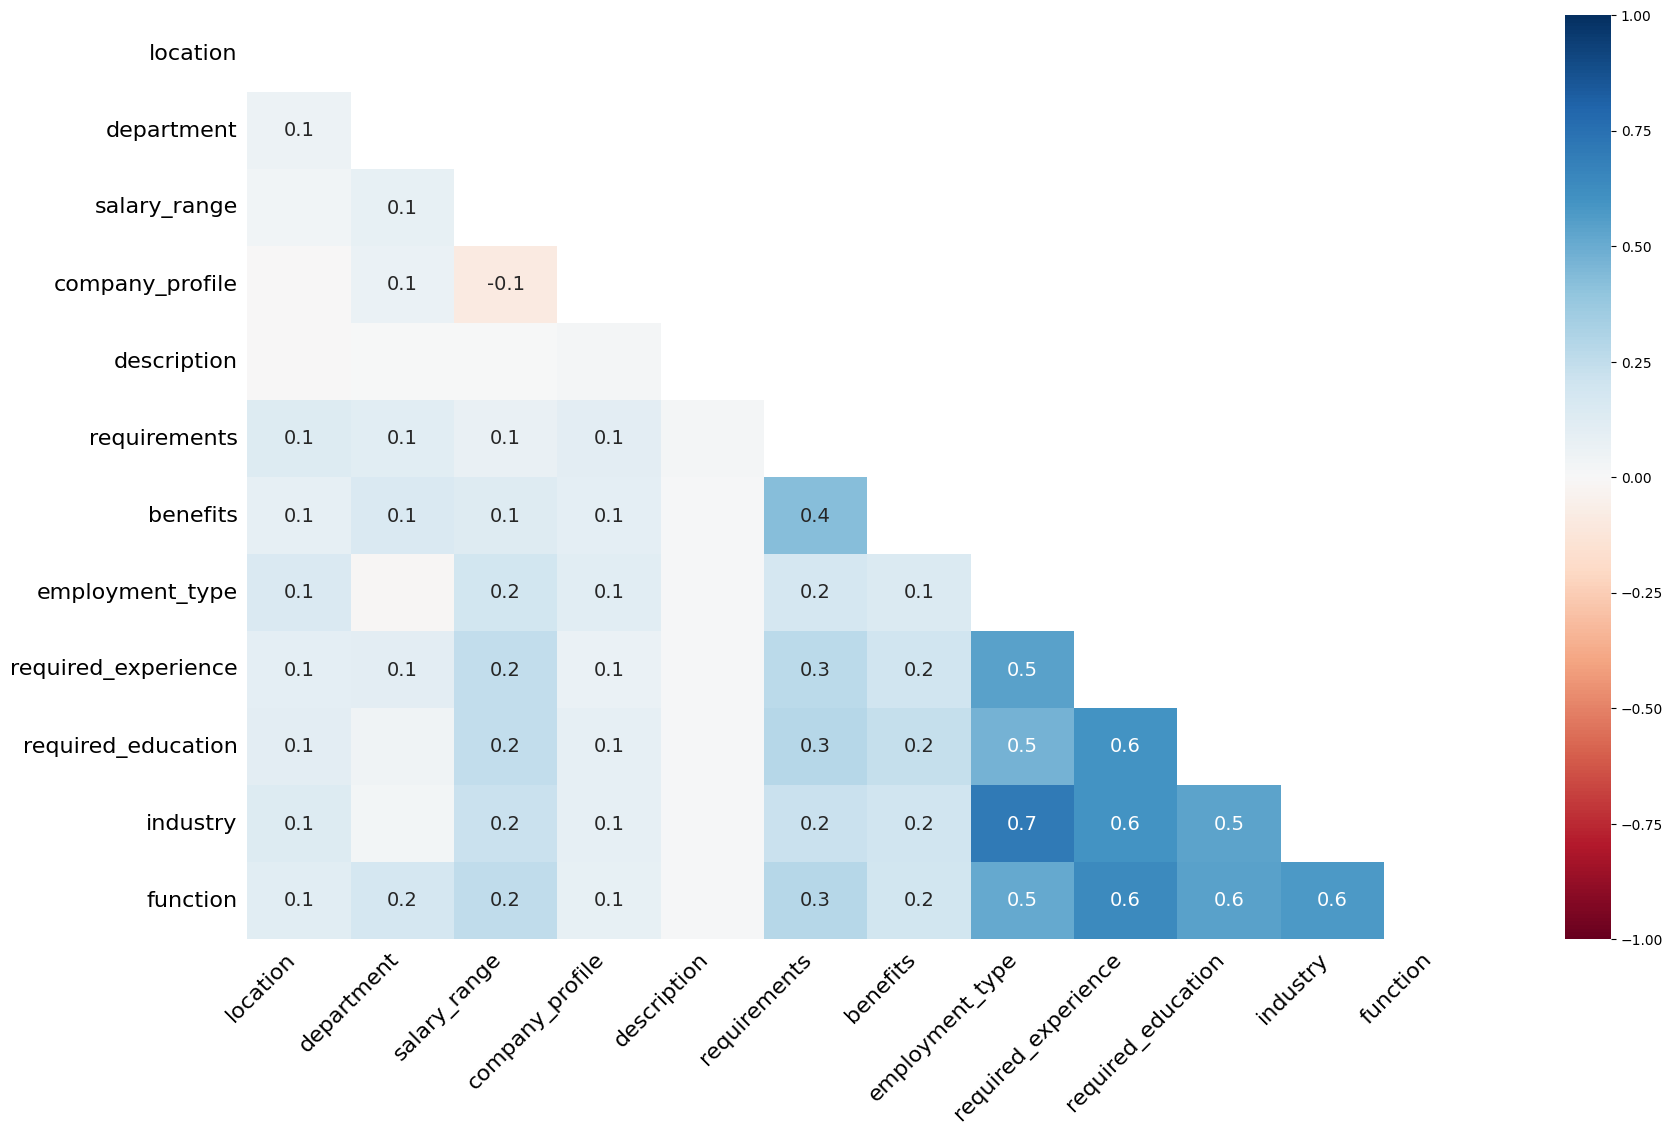

In [14]:
# Visualize Missing Data
plt.figure(figsize=(10,5))
msno.bar(df, color="dodgerblue")
plt.show()

plt.figure(figsize=(10,5))
msno.heatmap(df)
plt.show()


In [18]:
# Handle missing values
print("Percentage of missing values:")
print((df.isnull().sum() / len(df) * 100).round(2))

Percentage of missing values:
job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.08
benefits               40.34
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64


In [8]:
# Fill missing categorical values with 'Unknown'
categorical_cols = ['location', 'department', 'employment_type', 'required_experience', 
                   'required_education', 'industry', 'function']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21068\2935081662.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [9]:
# Fill missing text columns with empty string
text_cols = ['company_profile', 'description', 'requirements', 'benefits']
for col in text_cols:
    df[col].fillna('', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21068\4022429995.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)


In [10]:
# When it’s missing, it doesn’t mean “empty text,” it means the employer didn’t provide salary info.
# Fill salary_range with 'Not specified'
df['salary_range'].fillna('Not specified', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21068\2273523918.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary_range'].fillna('Not specified', inplace=True)


In [11]:
# Checking no more missing values
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_7016\2920614326.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_7016\2920614326.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



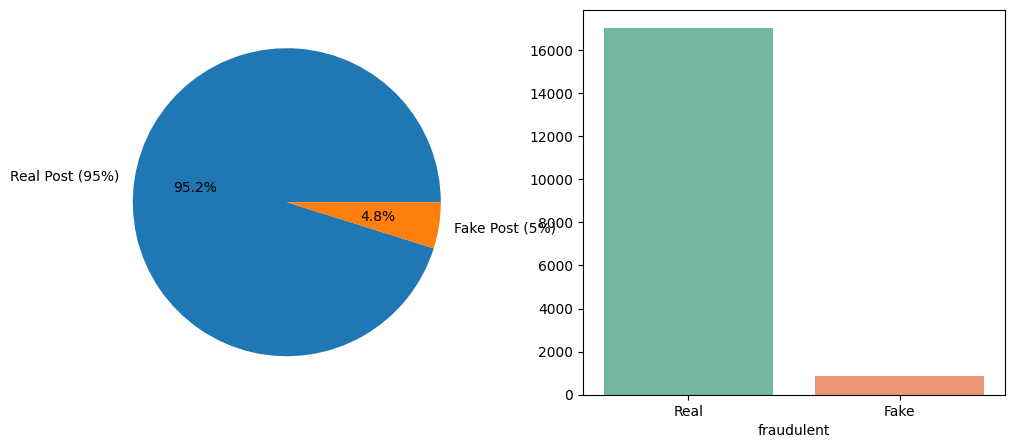

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
df["fraudulent"].value_counts().plot(
    kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'], autopct='%1.1f%%'
)

# Corrected barplot
temp = df["fraudulent"].value_counts()
sns.barplot(x=temp.index, y=temp.values, ax=axes[1], palette="Set2")

# Clean labels
axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(['Real', 'Fake'])

plt.show()


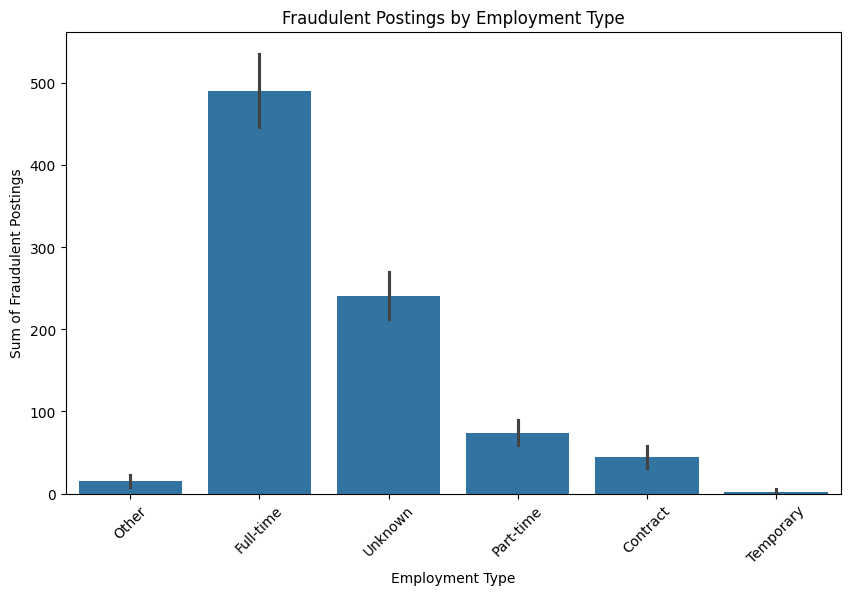

In [45]:
# Bar plot for employment_type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

In [9]:
import re
from bs4 import BeautifulSoup

def simple_clean(text):
    if pd.isna(text): 
        return ""
    text = BeautifulSoup(str(text), "lxml").get_text()   # remove HTML
    text = re.sub(r"http\S+|www\S+", "", text)           # remove links
    text = re.sub(r"[^a-zA-Z]", " ", text)               # keep letters only
    text = text.lower()
    return text

# Create cleaned column
df['description_clean'] = df['description'].apply(simple_clean)


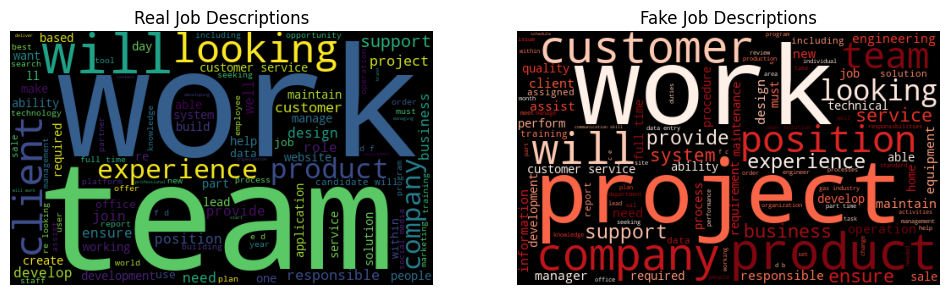

In [10]:
from wordcloud import WordCloud

real_text = " ".join(df[df['fraudulent']==0]['description_clean'])
fake_text = " ".join(df[df['fraudulent']==1]['description_clean'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500,height=300,max_words=100).generate(real_text))
plt.axis("off")
plt.title("Real Job Descriptions")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500,height=300,max_words=100,colormap="Reds").generate(fake_text))
plt.axis("off")
plt.title("Fake Job Descriptions")

plt.show()


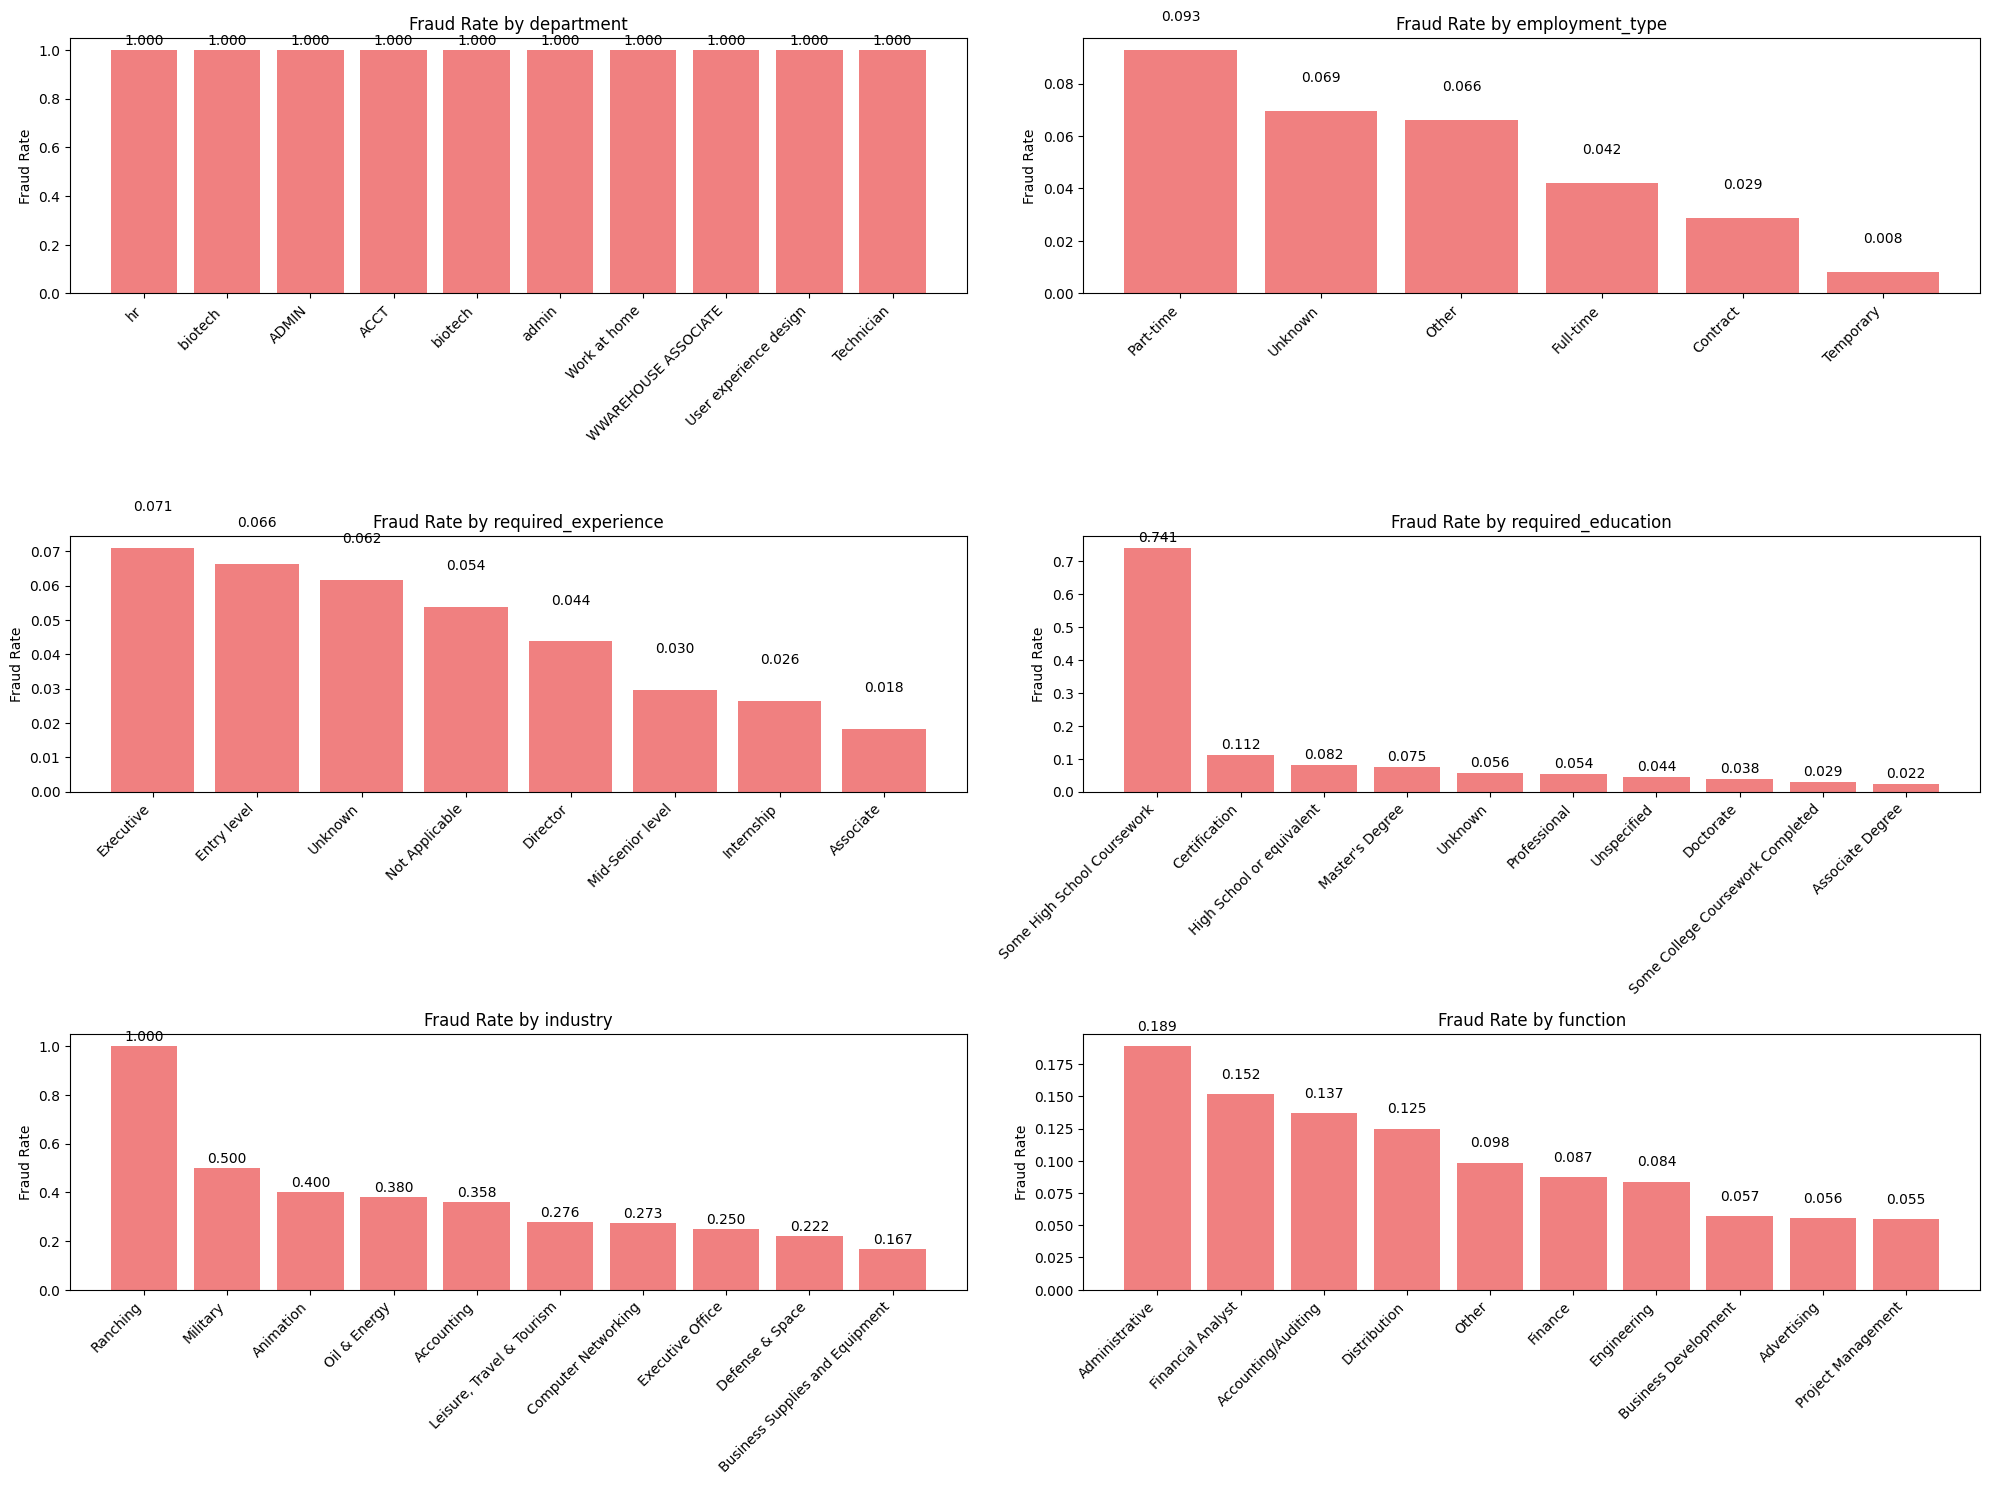

In [ ]:

def analyze_categorical_features(df, target='fraudulent'):
    cat_cols = ['department', 'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(cat_cols):
        # Calculate fraud rate by category
        fraud_rates = df.groupby(col)[target].mean().sort_values(ascending=False)
        
        # Plot top 10 categories by fraud rate
        top_categories = fraud_rates.head(10)
        axes[i].bar(range(len(top_categories)), top_categories.values, color='lightcoral')
        axes[i].set_xticks(range(len(top_categories)))
        axes[i].set_xticklabels(top_categories.index, rotation=45, ha='right')
        axes[i].set_title(f'Fraud Rate by {col}')
        axes[i].set_ylabel('Fraud Rate')
        
        # Add value annotations
        for j, v in enumerate(top_categories.values):
            axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

analyze_categorical_features(df)

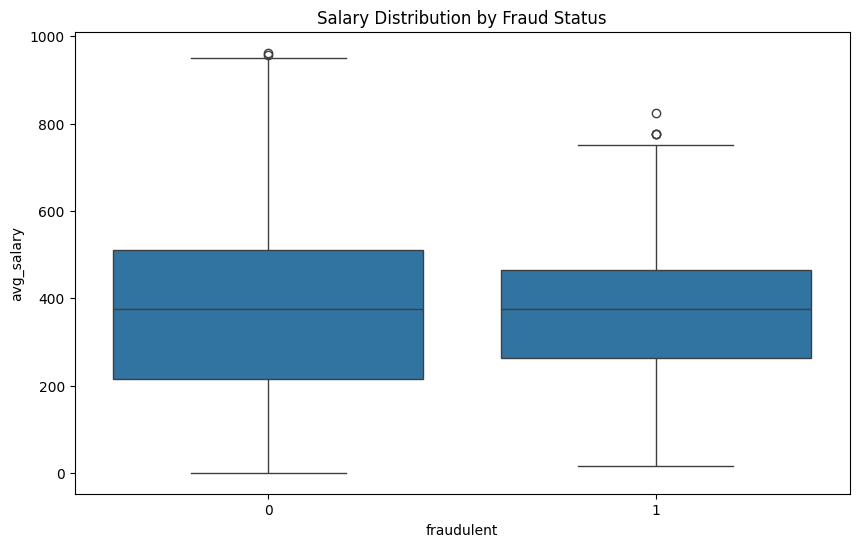

In [33]:
# Salary extraction and analysis
def extract_salary(s):
    if pd.isna(s) or s == 'Not specified': return np.nan
    amounts = re.findall(r'\$?(\d{1,3}(?:,\d{3})*)', str(s))
    amounts = [float(a.replace(',', '')) for a in amounts if float(a.replace(',', '')) > 0]
    return np.mean(amounts) if amounts else np.nan

df['avg_salary'] = df['salary_range'].apply(extract_salary)

# Salary vs fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraudulent', y='avg_salary', data=df[df['avg_salary'].notna()])
plt.title('Salary Distribution by Fraud Status')
plt.show()

In [17]:
def smart_categorical_encoding(df):
    """
    STEP 3: Optimal categorical variable encoding
    Purpose: Prevent dimensionality explosion while preserving information
    """
    df_encoded = df.copy()
    encoding_plan = {}
    
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    for col in categorical_cols:
        unique_count = df[col].nunique()
        
        if unique_count <= 5:
            # Low cardinality: One-Hot Encoding (preserves all information)
            encoded = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df_encoded = pd.concat([df_encoded, encoded], axis=1)
            df_encoded.drop(col, axis=1, inplace=True)
            encoding_plan[col] = f'onehot_{unique_count}_categories'
            
        elif unique_count <= 20:
            # Medium cardinality: Target Encoding (if target available)
            if 'fraudulent' in df.columns:
                # Calculate mean target per category with smoothing
                global_mean = df['fraudulent'].mean()
                category_means = df.groupby(col)['fraudulent'].mean()
                category_counts = df.groupby(col)['fraudulent'].count()
                
                # Smoothing to prevent overfitting
                smoothed_means = (category_counts * category_means + 10 * global_mean) / (category_counts + 10)
                df_encoded[col] = df[col].map(smoothed_means)
                encoding_plan[col] = 'target_encoding'
            else:
                # Frequency encoding as fallback
                freq = df[col].value_counts(normalize=True)
                df_encoded[col] = df[col].map(freq)
                encoding_plan[col] = 'frequency_encoding'
                
        else:
            # High cardinality: Frequency Encoding (prevents dimensionality issues)
            freq = df[col].value_counts(normalize=True)
            df_encoded[col] = df[col].map(freq)
            encoding_plan[col] = 'frequency_encoding'
    
    print("\n📊 CATEGORICAL ENCODING PLAN")
    print("=" * 50)
    for col, strategy in encoding_plan.items():
        print(f"{col:25s} → {strategy}")
    
    return df_encoded, encoding_plan

# Apply categorical encoding
df_encoded, encoding_plan = smart_categorical_encoding(df)


📊 CATEGORICAL ENCODING PLAN
title                     → frequency_encoding
location                  → frequency_encoding
department                → frequency_encoding
salary_range              → frequency_encoding
company_profile           → frequency_encoding
description               → frequency_encoding
requirements              → frequency_encoding
benefits                  → frequency_encoding
employment_type           → target_encoding
required_experience       → target_encoding
required_education        → target_encoding
industry                  → frequency_encoding
function                  → frequency_encoding


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func